# Analysis

In [1]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import requests
from pprint import pprint
from census import Census
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from requests.structures import CaseInsensitiveDict
import datetime
from scipy import stats


# File to Load (Remember to Change These)
poverty_path = Path("Resources/minnesota_poverty_data.csv")
lead_path = Path("Resources/lead_by_blood_levels.csv")

poverty_df = pd.read_csv(poverty_path)
lead_df = pd.read_csv(lead_path)
poverty_df.head()

,Sample Population,Population Poverty,Female Poverty,Females < 5 Poverty,Females 5 Poverty,Females 6 to 11 Poverty,Females 12 to 14 Poverty,Females 15 Poverty,Females 16 to 17 Poverty,Females 18 to 24 Poverty,...,Male Senior Poverty %.1,Male Senior Poverty % (White Alone).1,Male Senior Poverty % (Black or African American Alone).1,Male Senior Poverty % (American Indian and Alaska Native Alone).1,Male Senior Poverty % (Asian Alone).1,Male Senior Poverty % (Native Hawaiian and Other Pacific Islander Alone).1,Male Senior Poverty % (Some Other Race Alone).1,Male Senior Poverty % (Two or More Races).1,"Male Senior Poverty % (White Alone, Not Hispanic or Latino).1",Male Senior Poverty % (Hispanic or Latino).1
0,16129.0,2185.0,1197.0,133.0,16.0,85.0,37.0,23.0,48.0,124.0,...,1.382603,1.401960,0.000000,0.000000,0.000000,NaN,0.000000,3.125000,1.401290,0.735294
1,323359.0,20730.0,11736.0,992.0,302.0,1123.0,535.0,124.0,385.0,1314.0,...,0.360281,0.378860,0.559701,0.000000,0.063786,0.0,0.227687,0.000000,0.383482,0.178053
2,31644.0,3554.0,2010.0,251.0,69.0,109.0,50.0,21.0,75.0,312.0,...,1.131336,1.111585,6.930693,1.774273,0.000000,0.0,0.000000,0.176678,1.119657,0.000000
3,42043.0,8383.0,4528.0,581.0,98.0,406.0,128.0,88.0,97.0,1021.0,...,0.727826,0.652077,0.749064,1.159128,0.000000,0.0,0.000000,0.449294,0.658254,0.000000
4,37411.0,4428.0,2570.0,213.0,100.0,214.0,84.0,25.0,44.0,585.0,...,0.569351,0.598819,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.606544,0.000000


## State Summary

In [2]:
county_count = len(poverty_df["County"].unique())
print(f'There are {county_count} counties.')

There are 87 counties.


In [3]:
# summary stats for population

byYear_andCounty_df = poverty_df.groupby(['Year', 'County'])

print('Population Stats by Year and County:')
print('____________________________________________')
summary_stats_population = byYear_andCounty_df['Sample Population'].describe()
summary_stats_population

Population Stats by Year and County:
____________________________________________


count      mean  std       min       25%       50%  \
Year County                                                                
2010 Aitkin             1.0   16129.0  NaN   16129.0   16129.0   16129.0   
     Anoka              1.0  323359.0  NaN  323359.0  323359.0  323359.0   
     Becker             1.0   31644.0  NaN   31644.0   31644.0   31644.0   
     Beltrami           1.0   42043.0  NaN   42043.0   42043.0   42043.0   
     Benton             1.0   37411.0  NaN   37411.0   37411.0   37411.0   
...                     ...       ...  ...       ...       ...       ...   
2021 Watonwan           1.0   11105.0  NaN   11105.0   11105.0   11105.0   
     Wilkin             1.0    6391.0  NaN    6391.0    6391.0    6391.0   
     Winona             1.0   46459.0  NaN   46459.0   46459.0   46459.0   
     Wright             1.0  138525.0  NaN  138525.0  138525.0  138525.0   
     Yellow Medicine    1.0    9469.0  NaN    9469.0    9469.0    9469.0   

                           75%       max  
Year County                               
2010 Aitkin            16129.0   16129.0  
     Anoka            323359.0  323359.0  
     Becker            31644.0   31644.0  
     Beltrami          42043.0   42043.0  
     Benton            37411.0   37411.0  
...                        ...       ...  
2021 Watonwan          11105.0   11105.0  
     Wilkin             6391.0    6391.0  
     Winona            46459.0   46459.0  
     Wright           138525.0  138525.0  
     Yellow Medicine    9469.0    9469.0  

[1044 rows x 8 columns]

In [4]:
# Summing up the counties for each year
print('Population Stats by Year and State:')
print('____________________________________________')
state_population = summary_stats_population.groupby('Year').sum()
state_population

Population Stats by Year and State:
____________________________________________


,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2010,87.0,5119104.0,0.0,5119104.0,5119104.0,5119104.0,5119104.0,5119104.0
2011,87.0,5155949.0,0.0,5155949.0,5155949.0,5155949.0,5155949.0,5155949.0
2012,87.0,5191097.0,0.0,5191097.0,5191097.0,5191097.0,5191097.0,5191097.0
2013,87.0,5223936.0,0.0,5223936.0,5223936.0,5223936.0,5223936.0,5223936.0
2014,87.0,5260351.0,0.0,5260351.0,5260351.0,5260351.0,5260351.0,5260351.0
2015,87.0,5295613.0,0.0,5295613.0,5295613.0,5295613.0,5295613.0,5295613.0
2016,87.0,5327019.0,0.0,5327019.0,5327019.0,5327019.0,5327019.0,5327019.0
2017,87.0,5366210.0,0.0,5366210.0,5366210.0,5366210.0,5366210.0,5366210.0
2018,87.0,5403634.0,0.0,5403634.0,5403634.0,5403634.0,5403634.0,5403634.0


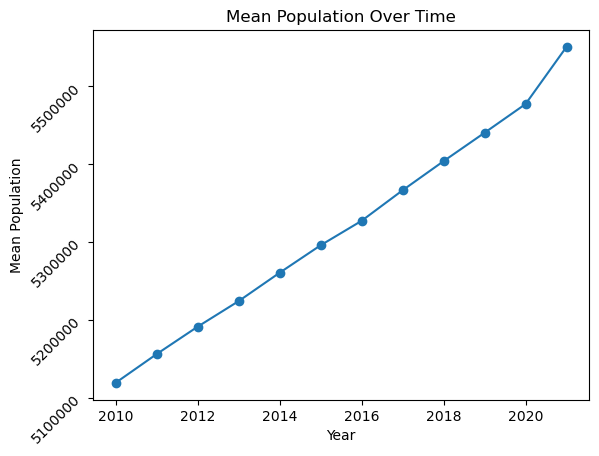

In [5]:

state_population['mean'].plot(kind='line', marker='o', title='Mean Population Over Time')

plt.ylabel('Mean Population')  # Label for the y-axis
plt.yticks(rotation=45)       # Rotate y-axis labels for better readability
plt.ticklabel_format(style='plain', axis='y')  # Disable scientific notation on the y-axis labels

# Show the plot
plt.show()

In [6]:
most_recent_year = poverty_df['Year'].max()
most_recent_data = poverty_df[poverty_df['Year'] == most_recent_year]
most_populated_counties = most_recent_data.nlargest(10, 'Sample Population')
least_populated_counties = most_recent_data.nsmallest(10, 'Sample Population')

In [7]:
print(f'As of {most_recent_year} the most populated counties are: ')
most_populated_counties['County']

As of 2021 the most populated counties are: 


983       Hennepin
1018        Ramsey
975         Dakota
958          Anoka
1038    Washington
1025     St. Louis
1011       Olmsted
1029       Stearns
1026         Scott
1042        Wright
Name: County, dtype: object

In [8]:
print(f'As of {most_recent_year} the least populated counties are: ')
least_populated_counties['County']

As of 2021 the least populated counties are: 


1034             Traverse
995     Lake of the Woods
1019             Red Lake
991               Kittson
962             Big Stone
1000             Mahnomen
997               Lincoln
972                  Cook
982                 Grant
1010               Norman
Name: County, dtype: object

In [9]:
df_year_sorted = poverty_df.sort_values(by='Year')

initial_population = df_year_sorted.groupby('County')['Sample Population'].first()
final_population = df_year_sorted.groupby('County')['Sample Population'].last()
population_growth = (final_population - initial_population) / initial_population * 100
most_growth_counties = population_growth.nlargest(10)
least_growth_counties = population_growth.nsmallest(10)

In [10]:
print(f'The counties with the most growth are: ')
most_growth_counties

The counties with the most growth are: 


County
Carver        18.789386
Scott         17.851529
Clay          16.152395
Wright        15.734552
Olmsted       13.939843
Washington    13.330528
Hennepin      12.044401
Sherburne     11.475604
Dakota        10.639956
Anoka         10.538442
Name: Sample Population, dtype: float64

In [11]:
print(f'The counties with the least growth are: ')
least_growth_counties

The counties with the least growth are: 


County
Koochiching         -11.046512
Lake of the Woods   -10.224801
Yellow Medicine      -8.785281
Kittson              -8.533573
Renville             -8.413767
Lincoln              -7.128344
Lac qui Parle        -6.590298
Norman               -6.179441
Faribault            -5.909970
Traverse             -5.796270
Name: Sample Population, dtype: float64

In [12]:
# summary stats for Poverty

byYear_andCounty_df = poverty_df.groupby(['Year', 'County'])

print('Poverty Percentage Stats by Year and County:')
print('____________________________________________')
summary_stats_poverty = byYear_andCounty_df['Poverty %'].describe()
summary_stats_poverty

Poverty Percentage Stats by Year and County:
____________________________________________


count       mean  std        min        25%        50%  \
Year County                                                                    
2010 Aitkin             1.0  13.547027  NaN  13.547027  13.547027  13.547027   
     Anoka              1.0   6.410831  NaN   6.410831   6.410831   6.410831   
     Becker             1.0  11.231197  NaN  11.231197  11.231197  11.231197   
     Beltrami           1.0  19.939110  NaN  19.939110  19.939110  19.939110   
     Benton             1.0  11.836091  NaN  11.836091  11.836091  11.836091   
...                     ...        ...  ...        ...        ...        ...   
2021 Watonwan           1.0  13.030167  NaN  13.030167  13.030167  13.030167   
     Wilkin             1.0  13.534658  NaN  13.534658  13.534658  13.534658   
     Winona             1.0  13.441960  NaN  13.441960  13.441960  13.441960   
     Wright             1.0   4.885039  NaN   4.885039   4.885039   4.885039   
     Yellow Medicine    1.0   9.937691  NaN   9.937691   9.937691   9.937691   

                            75%        max  
Year County                                 
2010 Aitkin           13.547027  13.547027  
     Anoka             6.410831   6.410831  
     Becker           11.231197  11.231197  
     Beltrami         19.939110  19.939110  
     Benton           11.836091  11.836091  
...                         ...        ...  
2021 Watonwan         13.030167  13.030167  
     Wilkin           13.534658  13.534658  
     Winona           13.441960  13.441960  
     Wright            4.885039   4.885039  
     Yellow Medicine   9.937691   9.937691  

[1044 rows x 8 columns]

In [13]:
# Summing up the counties for each year
print('Poverty Percentage Stats by Year and State:')
print('____________________________________________')
state_poverty = summary_stats_poverty.groupby('Year').sum()
state_poverty

Poverty Percentage Stats by Year and State:
____________________________________________


,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2010,87.0,948.200884,0.0,948.200884,948.200884,948.200884,948.200884,948.200884
2011,87.0,990.467489,0.0,990.467489,990.467489,990.467489,990.467489,990.467489
2012,87.0,1006.030900,0.0,1006.030900,1006.030900,1006.030900,1006.030900,1006.030900
2013,87.0,1016.568932,0.0,1016.568932,1016.568932,1016.568932,1016.568932,1016.568932
2014,87.0,1022.880556,0.0,1022.880556,1022.880556,1022.880556,1022.880556,1022.880556
2015,87.0,1015.237793,0.0,1015.237793,1015.237793,1015.237793,1015.237793,1015.237793
2016,87.0,979.041921,0.0,979.041921,979.041921,979.041921,979.041921,979.041921
2017,87.0,960.372078,0.0,960.372078,960.372078,960.372078,960.372078,960.372078
2018,87.0,935.462603,0.0,935.462603,935.462603,935.462603,935.462603,935.462603


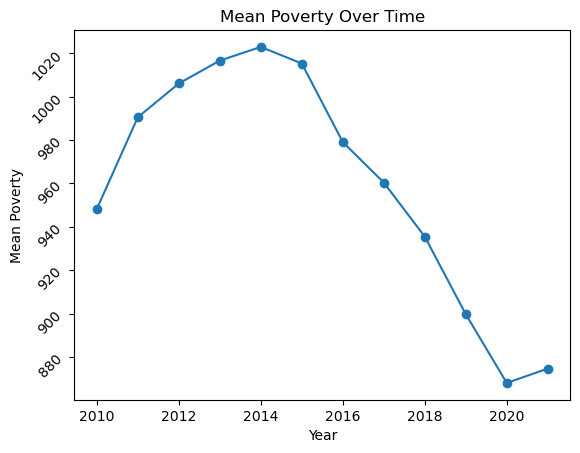

In [14]:
state_poverty['mean'].plot(kind='line', marker='o', title='Mean Poverty Over Time')

plt.ylabel('Mean Poverty')  # Label for the y-axis
plt.yticks(rotation=45)       # Rotate y-axis labels for better readability
plt.ticklabel_format(style='plain', axis='y')  # Disable scientific notation on the y-axis labels

# Show the plot
plt.show()

## Poverty and Lead

In [15]:
lead_df.head()

,indicator,year,location,ageGroup,ebllDescription,pctEbll,fips,numTested,numEbll,denominator,pctTested,unstable,Unnamed: 12
0,Test year (annual method),2000.0,Minnesota,<3 years,>10 mcg/dL (historic reference level),2.0,27000.0,28268.0,569.0,196758.0,14.4,False,NaN
1,Test year (annual method),2000.0,Minnesota,3-<6 years,>10 mcg/dL (historic reference level),2.9,27000.0,12903.0,379.0,201420.0,6.4,False,NaN
2,Test year (annual method),2000.0,Minnesota,<6 years,>10 mcg/dL (historic reference level),2.3,27000.0,41171.0,948.0,398178.0,10.3,False,NaN
3,Test year (annual method),2001.0,Minnesota,<3 years,>10 mcg/dL (historic reference level),1.8,27000.0,32641.0,580.0,200282.0,16.3,False,NaN
4,Test year (annual method),2001.0,Minnesota,3-<6 years,>10 mcg/dL (historic reference level),3.0,27000.0,14455.0,436.0,200373.0,7.2,False,NaN


In [16]:
# Find the common years
common_years = set(poverty_df['Year']).intersection(lead_df['year'])

# Filter both DataFrames to include only the common years
filtered_poverty_df = poverty_df[poverty_df['Year'].isin(common_years)]
filtered_lead_df = lead_df[lead_df['year'].isin(common_years)]

# Perform the merge on the filtered DataFrames
poverty_lead_df = pd.merge(filtered_poverty_df, filtered_lead_df, left_on=['County', 'Year'], right_on=['location', 'year'], how='inner')

poverty_lead_df = poverty_lead_df[poverty_lead_df['unstable'] != True]

# Now you have a DataFrame with data for the common years
poverty_lead_df.head()


,Sample Population,Population Poverty,Female Poverty,Females < 5 Poverty,Females 5 Poverty,Females 6 to 11 Poverty,Females 12 to 14 Poverty,Females 15 Poverty,Females 16 to 17 Poverty,Females 18 to 24 Poverty,...,ageGroup,ebllDescription,pctEbll,fips,numTested,numEbll,denominator,pctTested,unstable,Unnamed: 12
78,1114933.0,134363.0,72361.0,6580.0,1295.0,6325.0,3163.0,1128.0,2234.0,14358.0,...,<3 years,>10 mcg/dL (historic reference level),0.4,27053.0,18638.0,76.0,46098.0,40.4,False,NaN
80,1114933.0,134363.0,72361.0,6580.0,1295.0,6325.0,3163.0,1128.0,2234.0,14358.0,...,<6 years,>10 mcg/dL (historic reference level),0.4,27053.0,22063.0,95.0,91316.0,24.2,False,NaN
183,488851.0,77325.0,42196.0,4308.0,814.0,4939.0,1955.0,651.0,1645.0,8132.0,...,<3 years,>10 mcg/dL (historic reference level),0.5,27123.0,10398.0,49.0,21375.0,48.6,False,NaN
185,488851.0,77325.0,42196.0,4308.0,814.0,4939.0,1955.0,651.0,1645.0,8132.0,...,<6 years,>10 mcg/dL (historic reference level),0.5,27123.0,11824.0,63.0,41811.0,28.3,False,NaN
339,1124293.0,138258.0,73852.0,6581.0,1335.0,6466.0,2784.0,1023.0,2160.0,14161.0,...,<3 years,>10 mcg/dL (historic reference level),0.4,27053.0,18259.0,68.0,46675.0,39.1,False,NaN


In [17]:
print(poverty_lead_df['pctEbll'].dtype)
poverty_lead_df['pctEbll'] = poverty_lead_df['pctEbll'].fillna(0)
poverty_lead_df['pctEbll'] = pd.to_numeric(poverty_lead_df['pctEbll'], errors='coerce').fillna(0)

# Sort the DataFrame by 'pctEbll' in descending order
poverty_lead_df = poverty_lead_df.sort_values(by='pctEbll', ascending=False)

# Display the top N counties with the highest 'pctEbll'
top_elevated_lead_counties = poverty_lead_df.head(10)

print(top_elevated_lead_counties[['County', 'pctEbll', 'Year']])

object
        County  pctEbll  Year
1750    Ramsey      1.8  2016
601   Hennepin      0.9  2012
183     Ramsey      0.5  2010
185     Ramsey      0.5  2010
2273    Ramsey      0.5  2018
446     Ramsey      0.5  2011
1751    Ramsey      0.5  2016
602   Hennepin      0.5  2012
78    Hennepin      0.4  2010
968     Ramsey      0.4  2013


## Gender and Poverty

In [26]:
gender_df = poverty_df[['Year','County','Female Poverty %','Male Poverty %']]
gender_df = gender_df.groupby('Year')
gender_df.head()

,Year,County,Female Poverty %,Male Poverty %
0,2010,Aitkin,7.421415,6.125612
1,2010,Anoka,3.629403,2.781429
2,2010,Becker,6.351915,4.879282
3,2010,Beltrami,10.769926,9.169184
4,2010,Benton,6.869637,4.966454
87,2011,Aitkin,6.891623,5.350485
88,2011,Anoka,3.611881,2.990159
89,2011,Becker,6.647009,4.880956
90,2011,Beltrami,10.769303,8.901399
91,2011,Benton,7.810717,5.544202


In [51]:
female_poverty_mean = gender_df['Female Poverty %'].mean()
male_poverty_mean = gender_df['Male Poverty %'].mean()

print('Average Female Poverty Rates per County')
print('___________________________________________')
print(female_poverty_mean)
print('')

print('Average Male Poverty Rates per County')
print('___________________________________________')
print(male_poverty_mean)

Average Female Poverty Rates per County
___________________________________________
Year
2010    6.031411
2011    6.297198
2012    6.337771
2013    6.405957
2014    6.484602
2015    6.430316
2016    6.247160
2017    6.132849
2018    5.959459
2019    5.736342
2020    5.539813
2021    5.522323
Name: Female Poverty %, dtype: float64

Average Male Poverty Rates per County
___________________________________________
Year
2010    4.867449
2011    5.087485
2012    5.225802
2013    5.278743
2014    5.272646
2015    5.239084
2016    5.006195
2017    4.905911
2018    4.792985
2019    4.605273
2020    4.437608
2021    4.530933
Name: Male Poverty %, dtype: float64


In [54]:
female_poverty_mean_noIndex = gender_df['Female Poverty %'].mean().reset_index(drop=True)
male_poverty_mean_noIndex = gender_df['Male Poverty %'].mean().reset_index(drop=True)
years = gender_df['Year'].unique()

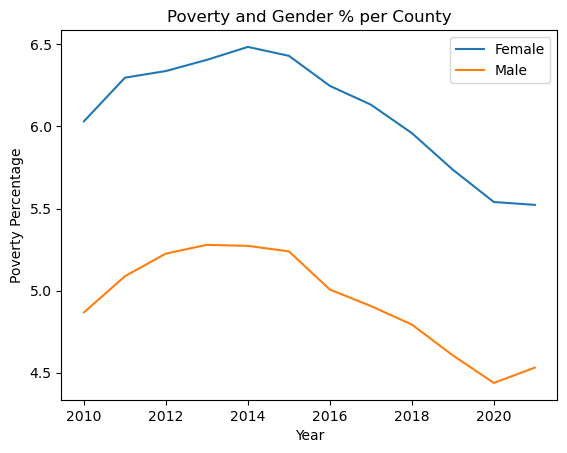

In [56]:
# Create a line plot
plt.plot(years, female_poverty_mean_noIndex, label='Female')
plt.plot(years, male_poverty_mean_noIndex, label='Male')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Poverty Percentage')
plt.title('Poverty and Gender % per County')

# Add a legend
plt.legend()

# Show the plot
plt.show()